In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>1.</b> Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 
```
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
```
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
X = zp
y = ks

<b>с интерсептом:</b>

Найдем коэффициент b

In [4]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

Найдем коэффициент a

In [5]:
a = np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

y = 444.18 + 2.62*x

In [6]:
y1_hat = a + b * X
y1_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

<b>без интерсепта:</b>

In [7]:
X2 = X.reshape(10, 1)
y2 = y.reshape(10, 1)

In [8]:
X2

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [9]:
y2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [10]:
B = np.dot(np.linalg.inv(np.dot(X2.T, X2)),X2.T@y)
B

array([5.88982042])

In [11]:
y2_hat = B * X
y2_hat

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

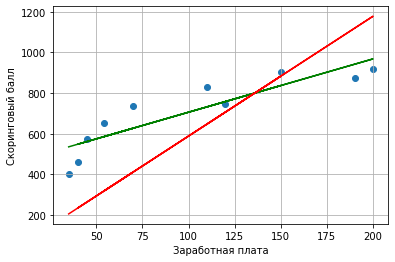

In [12]:
plt.grid()
plt.scatter(X, y)
plt.plot(X, y1_hat, color='green')
plt.plot(X, y2_hat, color='red')
plt.xlabel('Заработная плата')
plt.ylabel('Скоринговый балл')
plt.show()

<b>2.</b> Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [13]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(X)

In [14]:
def mse_(B1, y=y, X=X, n=n):
    return np.sum((B1*X - y)**2) / n

In [15]:
alpha = 1e-6
B1 = 0.1
for i in range(1001):
    B1 -= alpha * (2/n) * np.sum((B1*X - y) * X)
    if i % 50 == 0:
        print(f'iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

iteration: 0, B1 = 0.25952808, mse = 493237.7212546963
iteration: 50, B1 = 4.497229618367758, mse = 83233.94472982832
iteration: 100, B1 = 5.54537842245223, mse = 58151.31823171113
iteration: 150, B1 = 5.804626485478126, mse = 56616.849068093856
iteration: 200, B1 = 5.868748638669329, mse = 56522.97550129376
iteration: 250, B1 = 5.884608547059329, mse = 56517.232638059555
iteration: 300, B1 = 5.888531320728348, mse = 56516.88130936019
iteration: 350, B1 = 5.889501575592372, mse = 56516.85981627392
iteration: 400, B1 = 5.8897415574471985, mse = 56516.85850140053
iteration: 450, B1 = 5.889800914315978, mse = 56516.858420961085
iteration: 500, B1 = 5.889815595583751, mse = 56516.858416040064
iteration: 550, B1 = 5.889819226833643, mse = 56516.858415739014
iteration: 600, B1 = 5.889820124983314, mse = 56516.85841572062
iteration: 650, B1 = 5.889820347130743, mse = 56516.858415719485
iteration: 700, B1 = 5.889820402076462, mse = 56516.85841571941
iteration: 750, B1 = 5.889820415666681, mse 

<b>3.</b> В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Лапласса используем когда данные о дисперсии (или стандартном отклонении) генеральной совокупности,
Стьюдента - когда этих данных нет.


*<b>4.</b> Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [16]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(X)

In [17]:
def mse2_(B0, B1, y=y, X=X, n=n):
    return np.sum((B0 + B1*X - y)**2) / n

In [18]:
alpha = 5e-5
B0 = 0.1
B1 = 0.1
for i in range(1500001):
    B0_temp = B0
    B0 -= alpha * (2/n) * np.sum((B0_temp + B1*X - y))
    B1 -= alpha * (2/n) * np.sum((B0_temp + B1*X - y) * X)
    if i % 100000 == 0:
        print(f'iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse2_(B0, B1)}')

iteration: 0, B0 = 0.169966, B1 = 8.07539, mse = 122360.8044853729
iteration: 100000, B0 = 409.03758503899854, B1 = 2.8791831426087984, mse = 6783.640544683958
iteration: 200000, B0 = 441.39641524523927, B1 = 2.641007845630212, mse = 6472.375953981324
iteration: 300000, B0 = 443.9572751113981, B1 = 2.6221587847940984, mse = 6470.426487736031
iteration: 400000, B0 = 444.1599401401525, B1 = 2.6206670805791092, mse = 6470.414278128017
iteration: 500000, B0 = 444.1759789380671, B1 = 2.6205490279352976, mse = 6470.414201658608
iteration: 600000, B0 = 444.177248239628, B1 = 2.6205396853146192, mse = 6470.414201179677
iteration: 700000, B0 = 444.1773486914554, B1 = 2.620538945944757, mse = 6470.414201176677
iteration: 800000, B0 = 444.17735664115577, B1 = 2.6205388874314473, mse = 6470.41420117666
iteration: 900000, B0 = 444.1773572702843, B1 = 2.620538882800784, mse = 6470.41420117666
iteration: 1000000, B0 = 444.17735731999414, B1 = 2.620538882434897, mse = 6470.414201176661
iteration: 1100